# Import Dependencies

In [3]:
# importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
sns.set_theme(style="darkgrid")
%matplotlib inline

# Data

## Collection

In [4]:
# load dataset to a pandas dataframe
car_dataset = pd.read_csv("dataset/car_data.csv")

## Analysis

In [5]:
# view the contents of dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# shape of the dataset
car_dataset.shape

(301, 9)

In [7]:
# check for any missing value
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Inference: There are no missing values in the dataset**

In [8]:
# basic info of the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# statistical measures of dataset
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# check for duplicate rows
car_dataset.duplicated().sum()

2

**Inference: 2 duplicate rows were observed.**

In [11]:
# removing duplicate rows
car_dataset.drop_duplicates(keep='first', inplace=True)

In [12]:
# check for duplicate rows
car_dataset.duplicated().sum()

0

In [13]:
# shape of the dataset
car_dataset.shape

(299, 9)

In [14]:
# unique elements in the dataset
car_dataset.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

## Explore with Visuals

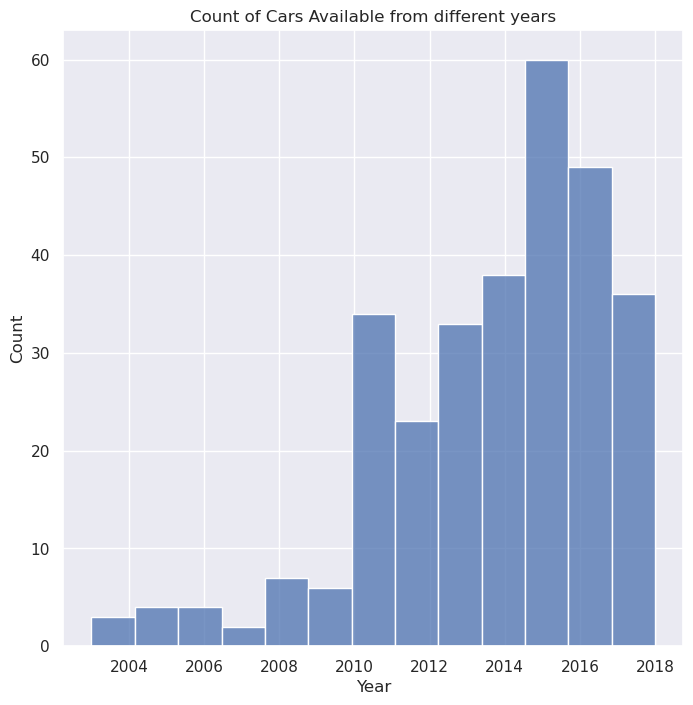

In [15]:
# Count of Cars Available from different years
plt.figure(figsize=(8,8))
plt.title("Count of Cars Available from different years")
sns.histplot(data=car_dataset, x="Year")
plt.show()

**Inference: We have very few cars from below 2010 and majority lie between 2014 and 2016.**

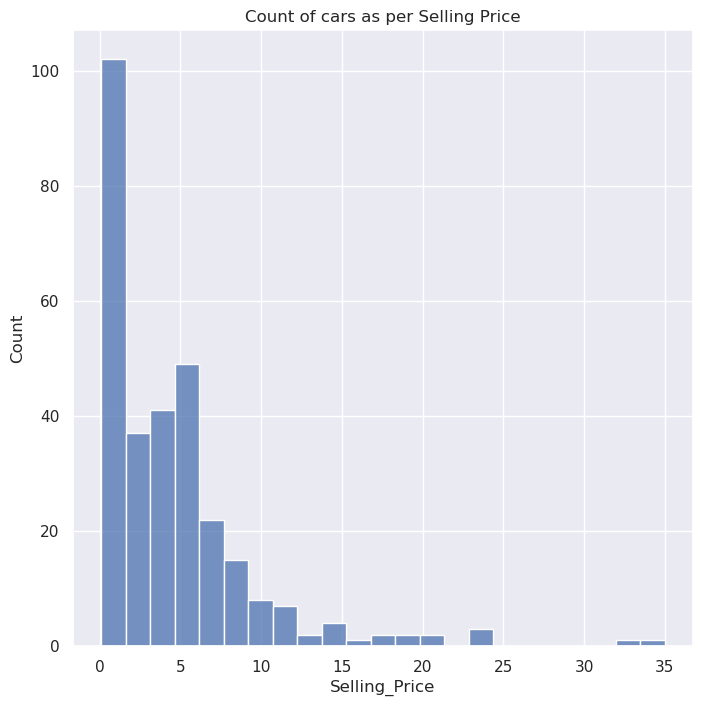

In [16]:
# Count of cars as per Selling Price
plt.figure(figsize=(8,8))
plt.title("Count of cars as per Selling Price")
sns.histplot(data=car_dataset, x="Selling_Price")
plt.show()

**Inference: There are very few cars with high selling price.**

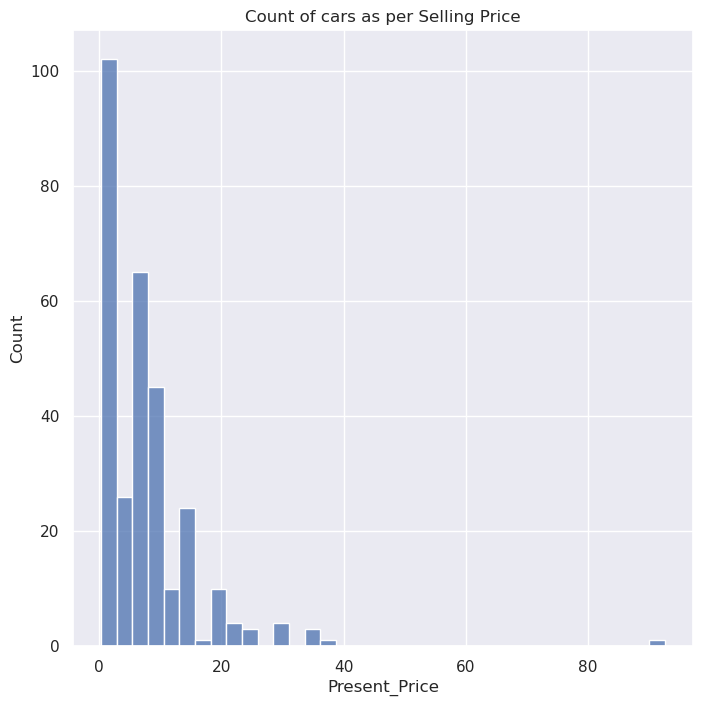

In [17]:
# Count of cars as per Present Price
plt.figure(figsize=(8,8))
plt.title("Count of cars as per Selling Price")
sns.histplot(data=car_dataset, x="Present_Price")
plt.show()

**Inference: There are very few cars with high present price.**

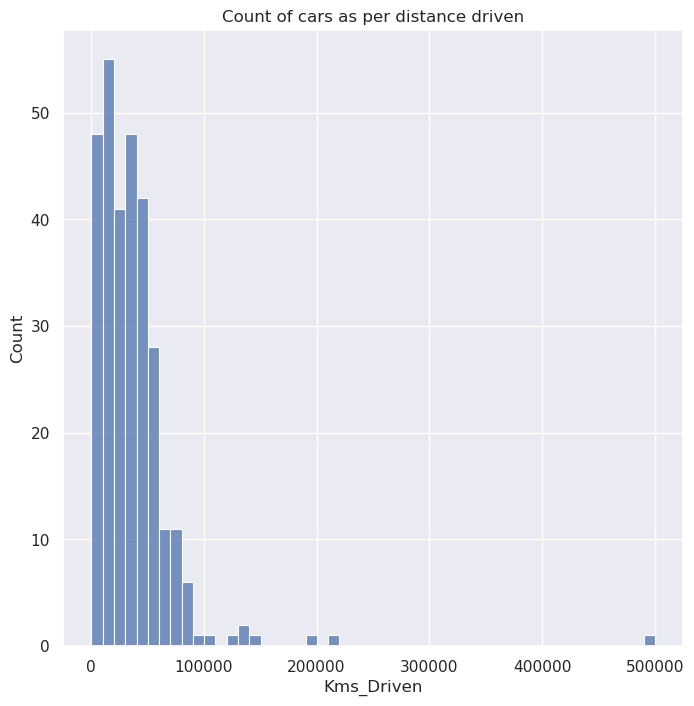

In [18]:
# Count of cars as per distance driven
plt.figure(figsize=(8,8))
plt.title("Count of cars as per distance driven")
sns.histplot(data=car_dataset, x="Kms_Driven")
plt.show()

**Inference: There are very few cars with high distance driven.**

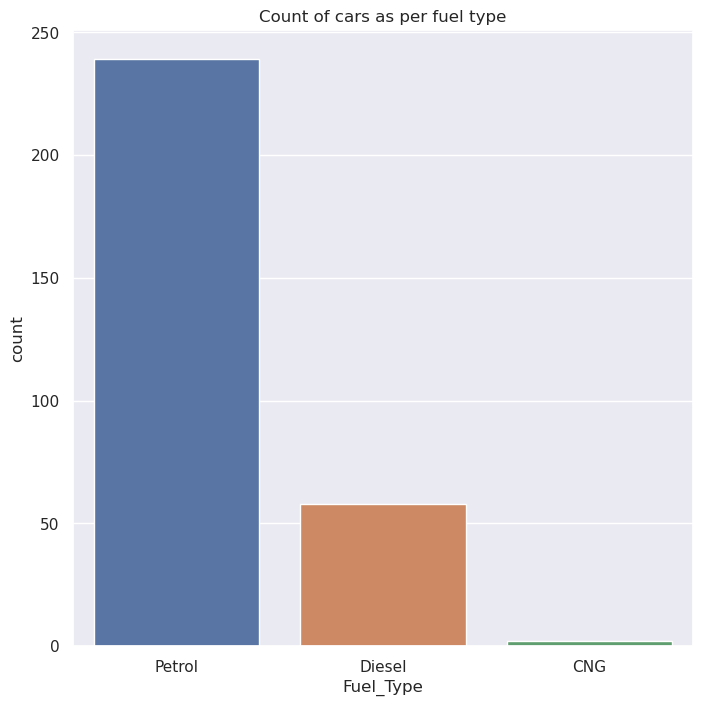

In [19]:
# Count of cars as per fuel type
plt.figure(figsize=(8,8))
plt.title("Count of cars as per fuel type")
sns.countplot(data=car_dataset, x="Fuel_Type")
plt.show()

**Inference: Majority of cars belong to Petrol category.**

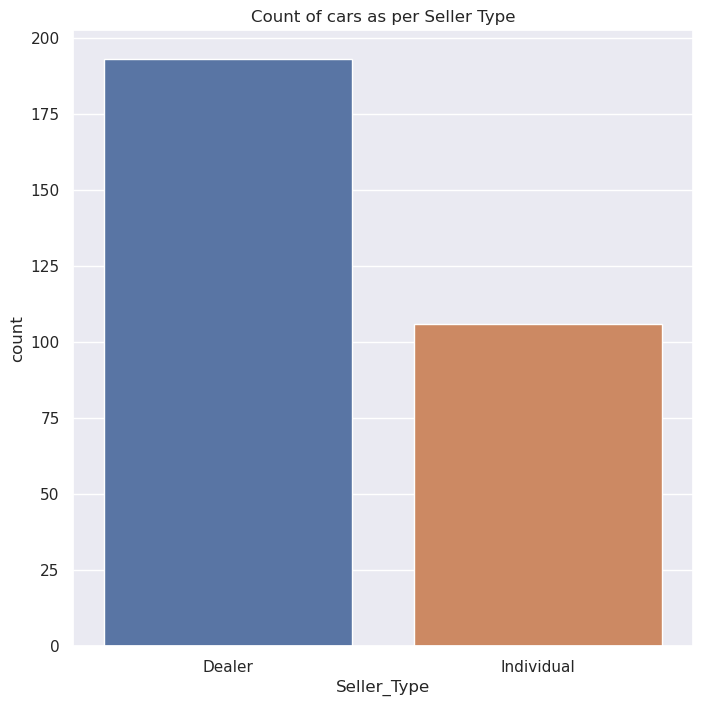

In [20]:
# Count of cars as per Seller_Type
plt.figure(figsize=(8,8))
plt.title("Count of cars as per Seller Type")
sns.countplot(data=car_dataset, x="Seller_Type")
plt.show()

**Inference: Count of car being sold by dealer is more than Individual.**

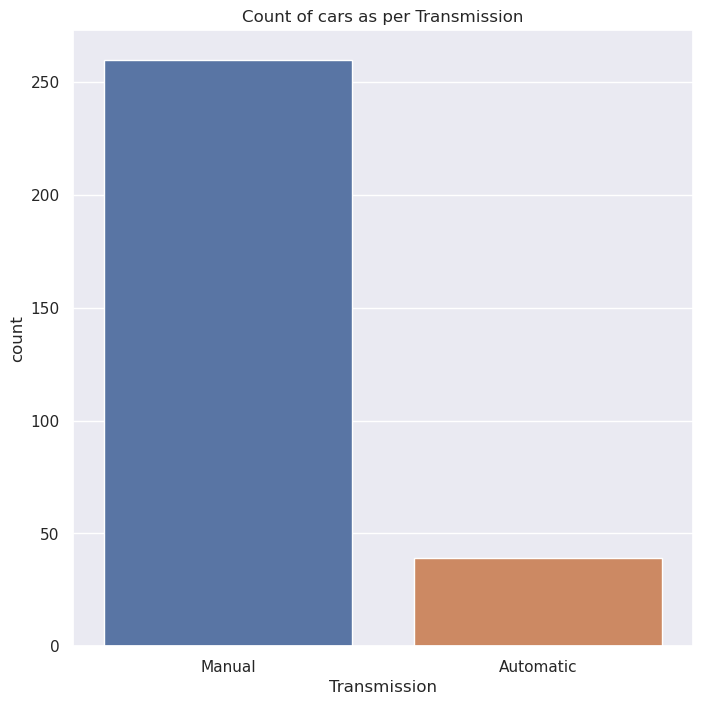

In [21]:
# Count of cars as per Transmission
plt.figure(figsize=(8,8))
plt.title("Count of cars as per Transmission")
sns.countplot(data=car_dataset, x="Transmission")
plt.show()

**Inference: Majority cars belong to Manual category.**

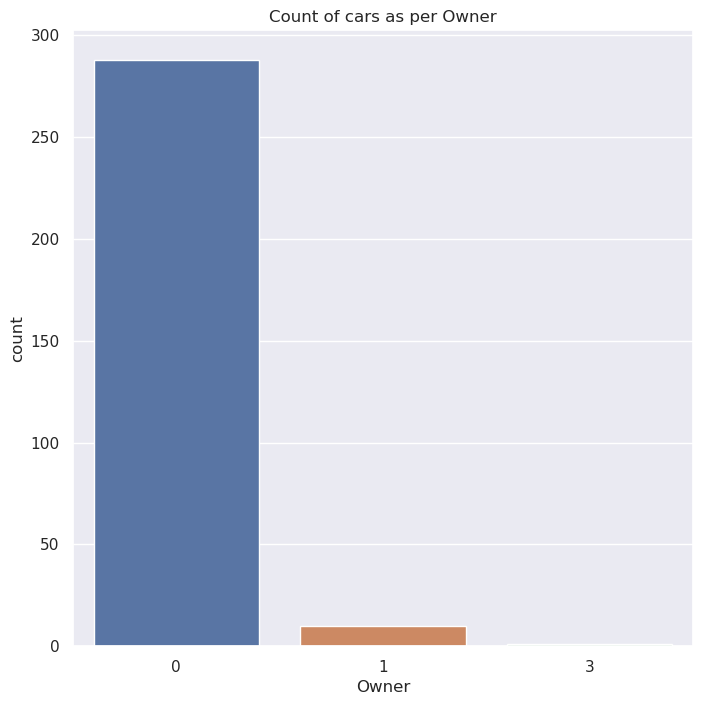

In [22]:
# Count of cars as per Owner
plt.figure(figsize=(8,8))
plt.title("Count of cars as per Owner")
sns.countplot(data=car_dataset, x="Owner")
plt.show()

**Inference: Most of the cars are first hand.**

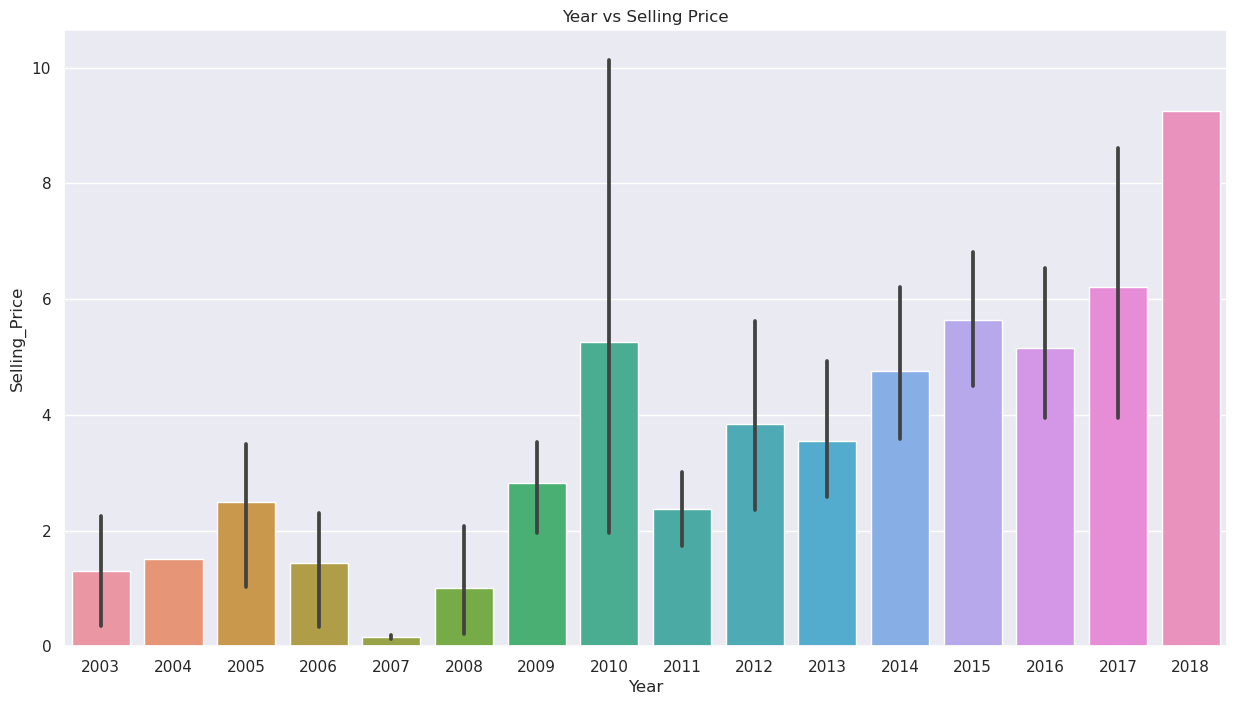

In [23]:
# relation between year and selling price
plt.figure(figsize=(15,8))
plt.title("Year vs Selling Price")
sns.barplot(data= car_dataset, x="Year", y="Selling_Price")
plt.show()

**Inference: We are able to see a trend that if vehicle is old then selling price is also low and vice versa**

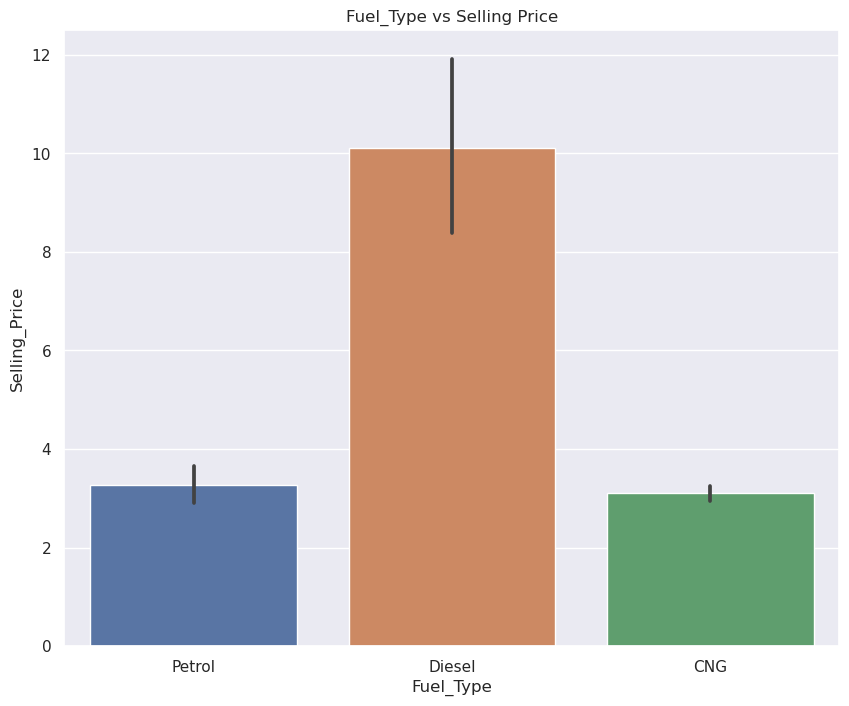

In [24]:
# relation between Fuel_Type and selling price
plt.figure(figsize=(10,8))
plt.title("Fuel_Type vs Selling Price")
sns.barplot(data= car_dataset, x="Fuel_Type", y="Selling_Price")
plt.show()

**Inference: The selling price of diesel cars are high as compared to petrol or cng.**

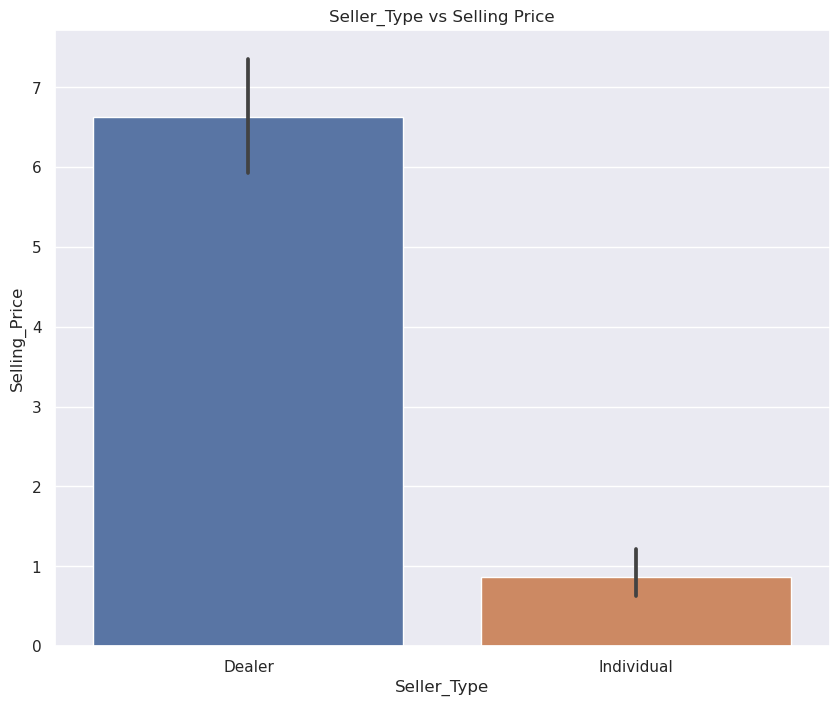

In [25]:
# relation between Seller_Type and selling price
plt.figure(figsize=(10,8))
plt.title("Seller_Type vs Selling Price")
sns.barplot(data= car_dataset, x="Seller_Type", y="Selling_Price")
plt.show()

**Inference: The selling price of cars sold by dealer is very high as compared to individuals selling their cars.**

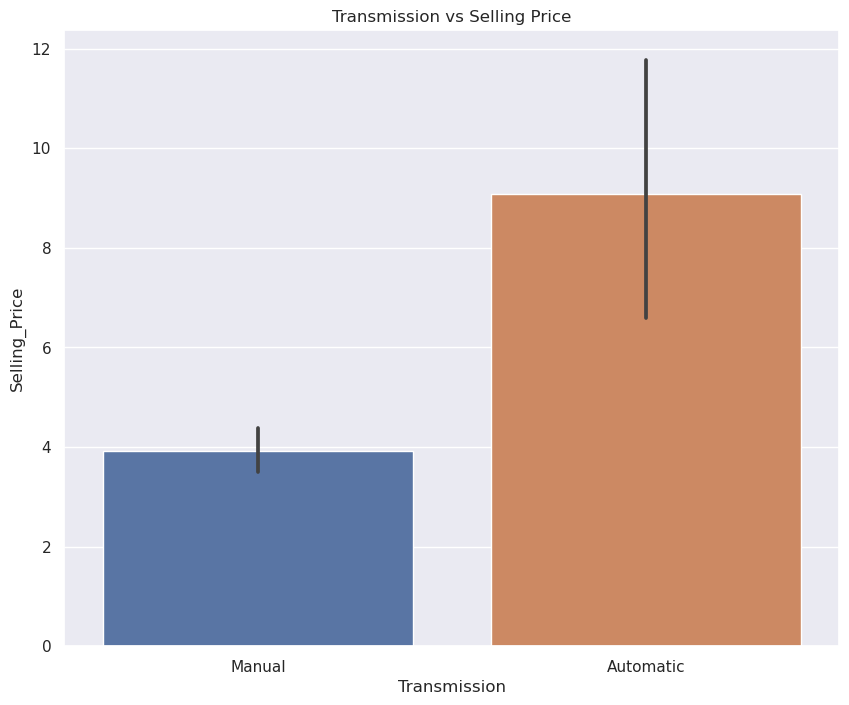

In [26]:
# relation between Transmission and selling price
plt.figure(figsize=(10,8))
plt.title("Transmission vs Selling Price")
sns.barplot(data= car_dataset, x="Transmission", y="Selling_Price")
plt.show()

**Inference: The selling price of automatic cars is high as compared to manual cars.**

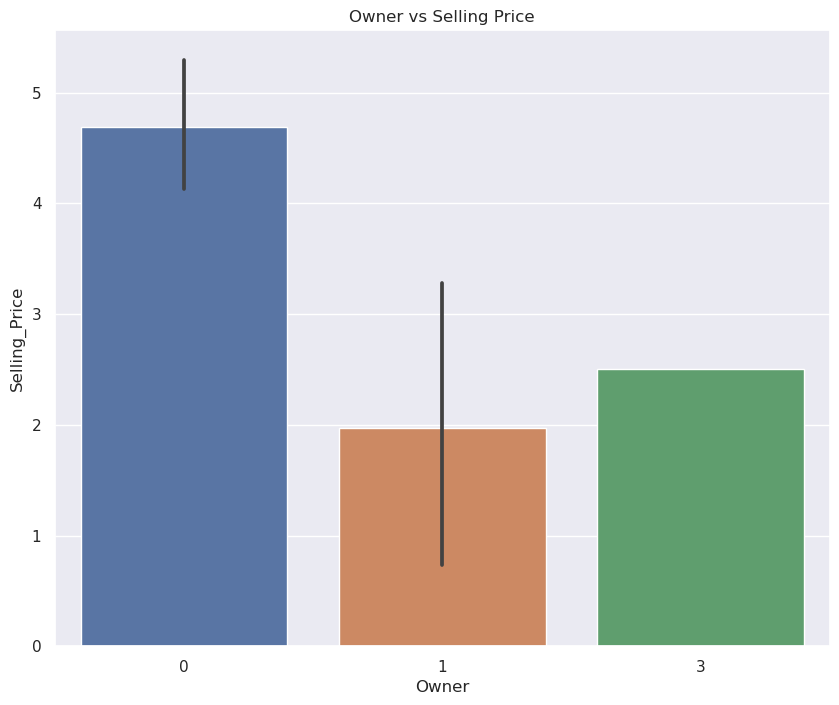

In [27]:
# relation between Owner and selling price
plt.figure(figsize=(10,8))
plt.title("Owner vs Selling Price")
sns.barplot(data= car_dataset, x="Owner", y="Selling_Price")
plt.show()

**Inference: The selling price for first hand owners is high.**

## Preprocessing

In [28]:
# Encoding the categorical features
le = LabelEncoder()

In [29]:
car_dataset['Fuel_Type']= le.fit_transform(car_dataset['Fuel_Type'])
car_dataset['Seller_Type']= le.fit_transform(car_dataset['Seller_Type'])
car_dataset['Transmission']= le.fit_transform(car_dataset['Transmission'])

In [30]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [31]:
# split the features and target
X = car_dataset.drop(columns=["Car_Name", "Selling_Price"], axis = 1)
Y = car_dataset["Selling_Price"]

# Model

## Split to training and testing data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(299, 7) (239, 7) (60, 7)


## Training & Evaluation

### Linear Regression

In [33]:
# instantiating LinearRegression
lr_model = LinearRegression()

In [34]:
# Fitting Linear Regression
lr_model.fit(X_train, Y_train)

LinearRegression()

In [35]:
# making predictions for training data
lr_train_predictions = lr_model.predict(X_train)

In [36]:
# making predictions for training data
lr_test_predictions = lr_model.predict(X_test)

#### Evaluation on Training Data

In [37]:
# Evaluation for training data
print(f"The mean absolute error for Linear Regression on Training data is: {mean_absolute_error(Y_train, lr_train_predictions)}")
print(f"The mean squared error for Linear Regression on Training data is: {mean_squared_error(Y_train, lr_train_predictions)}")
print(f"The R2 Score for Linear Regression on Training data is: {r2_score(Y_train, lr_train_predictions)}")

The mean absolute error for Linear Regression on Training data is: 1.1674333150585539
The mean squared error for Linear Regression on Training data is: 3.1127891271139476
The R2 Score for Linear Regression on Training data is: 0.8830066323340683


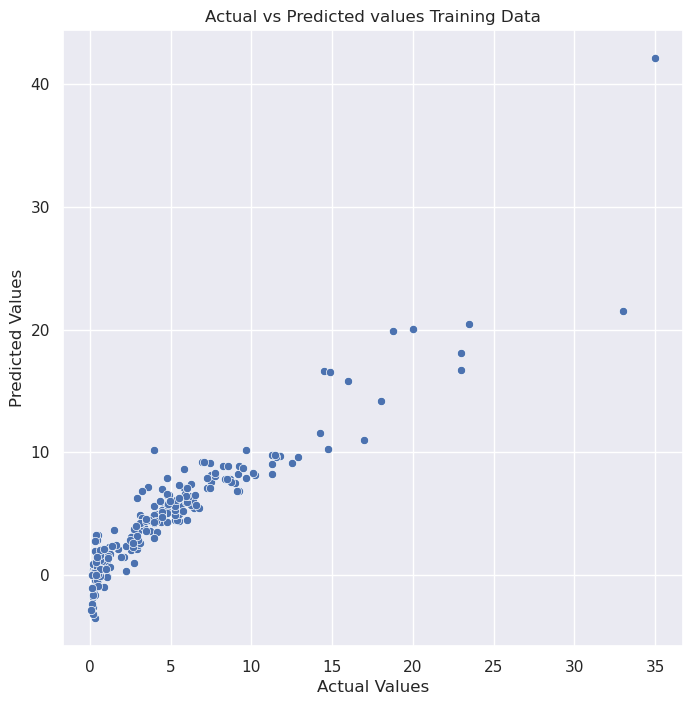

In [38]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_train, y = lr_train_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#### Evaluation on Test Data

In [39]:
# Evaluation for test data
print(f"The mean absolute error for Linear Regression on Test data is: {mean_absolute_error(Y_test, lr_test_predictions)}")
print(f"The mean squared error for Linear Regression on Test data is: {mean_squared_error(Y_test, lr_test_predictions)}")
print(f"The R2 Score for Linear Regression on Test data is: {r2_score(Y_test, lr_test_predictions)}")

The mean absolute error for Linear Regression on Test data is: 1.195125362034325
The mean squared error for Linear Regression on Test data is: 3.502744763393571
The R2 Score for Linear Regression on Test data is: 0.7895030781338994


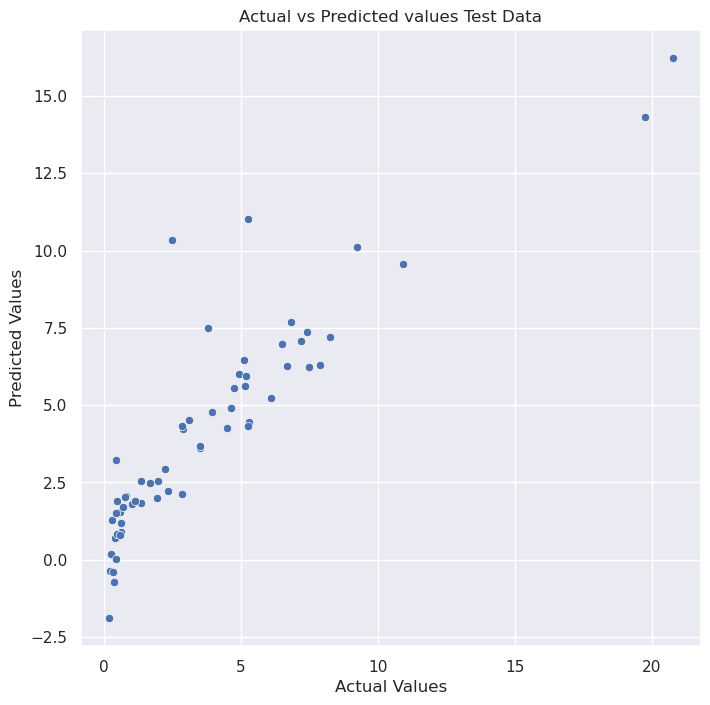

In [40]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_test, y = lr_test_predictions)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Lasso Regression

In [41]:
# instantiating Lasso
ls_model = Lasso()

In [42]:
# Fitting Lasso Regression
ls_model.fit(X_train, Y_train)

Lasso()

In [43]:
# making predictions for training data
ls_train_predictions = ls_model.predict(X_train)

In [44]:
# making predictions for training data
ls_test_predictions = ls_model.predict(X_test)

#### Evaluation on Training Data

In [45]:
# Evaluation for training data
print(f"The mean absolute error for Linear Regression on Training data is: {mean_absolute_error(Y_train, ls_train_predictions)}")
print(f"The mean squared error for Linear Regression on Training data is: {mean_squared_error(Y_train, ls_train_predictions)}")
print(f"The R2 Score for Linear Regression on Training data is: {r2_score(Y_train, ls_train_predictions)}")

The mean absolute error for Linear Regression on Training data is: 1.225332842005641
The mean squared error for Linear Regression on Training data is: 3.9133174554971917
The R2 Score for Linear Regression on Training data is: 0.8529189838538871


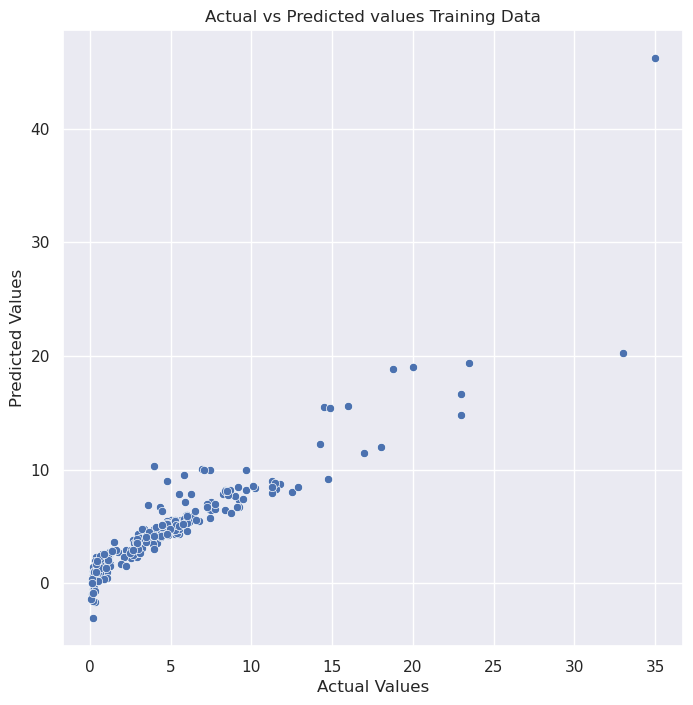

In [46]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_train, y = ls_train_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#### Evaluation on Test Data

In [47]:
# Evaluation for test data
print(f"The mean absolute error for Linear Regression on Test data is: {mean_absolute_error(Y_test, ls_test_predictions)}")
print(f"The mean squared error for Linear Regression on Test data is: {mean_squared_error(Y_test, ls_test_predictions)}")
print(f"The R2 Score for Linear Regression on Test data is: {r2_score(Y_test, ls_test_predictions)}")

The mean absolute error for Linear Regression on Test data is: 1.4035494304972713
The mean squared error for Linear Regression on Test data is: 4.345630316692007
The R2 Score for Linear Regression on Test data is: 0.7388499970676012


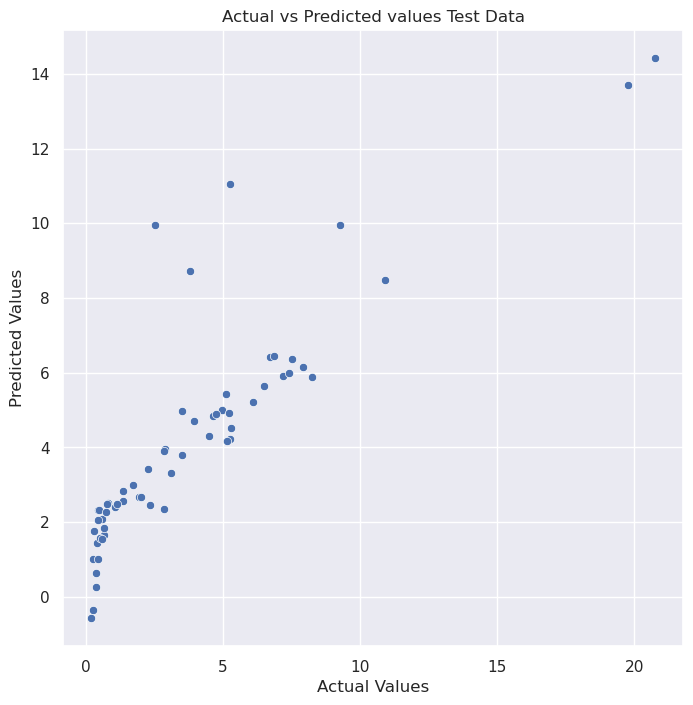

In [48]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_test, y = ls_test_predictions)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Saving the model

In [49]:
import pickle

ls_model_file = "saved_model/car_price_ls_model.sav"

pickle.dump(ls_model, open(ls_model_file, 'wb'))